# New York Time Data Analysis

## Analysis3
-Go through the [lead_paragraph] from each json file from the past 5 years
-Count frequency of words from keyword list ['Oscar','Super Bowl', 'Election', 'International']
-Plot a figure with frequency of different keywords from different years

In [45]:
import nltk
import os
import string
from nltk.corpus import stopwords
import json
import glob
import matplotlib.pyplot as plt
import numpy as np

In [46]:
#define local path
path_local = '/Users/lisha/Desktop/INFO7374_PythonIntro_Exam/Midterm/data/ArchieveTest'

In [47]:
#get all the directories of all files
list_dir = []
for path, subdirs, files in os.walk(path_local):
    for name in files:
        list_dir.append(os.path.join(path, name))

In [64]:
#Get document from ['response']['docs']
#Caculate keywords frequency and store them by years
dic_data = {}
dic_head = {}
for root, dirs, files in os.walk(os.getcwd()):            
    for f in list_dir:                        
        if f.lower().endswith((".json")):  
            with open(f, 'r') as data_file:
                dic_data.update(json.load(data_file))
                for list_doc in dic_data['response']['docs']:
                    year = list_doc['pub_date'][0:4]
                    list_temp = []
                    list_temp.append(str(list_doc['lead_paragraph']).lower())
                    if year in dic_head.keys():                        
                        dic_head[year].extend(list_temp)
                    else:
                        dic_head[year] = list_temp
                    

In [65]:
list_keywords = ['Oscar','Super Bowl', 'Election', 'International']
condition = {'Oscar':('academy award' or 'oscar'),'Super Bowl':('super bowl' or 'nfl' or 'quarterback'), 'Election':('president' or 'election'), 'International':'international'}

In [66]:
dic_freq={}

for year in dic_head.keys():
    dic_temp={}
    for head in dic_head[year]:
         for keyword in list_keywords:            
            if condition[keyword] in head:
                if keyword not in dic_temp.keys():
                    dic_temp[keyword] = 1
                else:
                    dic_temp[keyword] += 1
    if year not in dic_freq.keys():
        dic_freq[year]=dic_temp
    else:
        dic_freq[year].update(dic_temp)

In [67]:
print(dic_freq['2017'])

{'Election': 2428, 'International': 126, 'Super Bowl': 76, 'Oscar': 46}


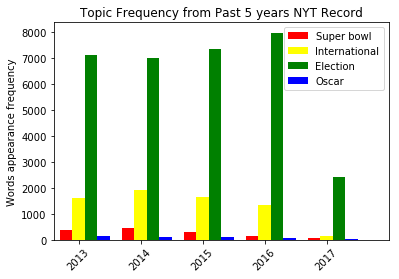

In [70]:
#Plot a figure with frequency of different keywords from different years
fig = plt.figure()
ax = fig.add_subplot(111)

list_year=[]
list_super=[]
list_inter=[]
list_ele=[]
list_oscar=[]
year = 2017-len(dic_freq)+1
for i in range(len(dic_freq)):
    list_year.append(str(year+i))
    list_super.append(dic_freq[str(year+i)]['Super Bowl'])
    list_inter.append(dic_freq[str(year+i)]['International'])
    list_ele.append(dic_freq[str(year+i)]['Election'])
    list_oscar.append(dic_freq[str(year+i)]['Oscar'])   
# the data
N = 5
# the x locations for the groups
ind = np.arange(N)
# the width of the bars
width = 0.2     
# the bars
rects1 = ax.bar(ind, list_super, width, color='red')
rects2 = ax.bar(ind+width, list_inter, width, color='yellow')
rects3 = ax.bar(ind+width*2, list_ele, width, color='green')
rects4 = ax.bar(ind+width*3, list_oscar, width, color='blue')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Words appearance frequency')
ax.set_title('Topic Frequency from Past 5 years NYT Record')
xTickMarks = list_year
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('Super bowl', 'International', 'Election', 'Oscar'))
plt.savefig('plot_frequency.jpg')
plt.show()    